<font color=blue>DESCRIPTION</font>: Graphs of crime in San Francisco



Dataset is from the SFPD Crime Incident Reporting System, 01/01/2003 through 5/13/2015.  This Dataset was from a Kaggle competition.  The dataset was been divided into a Training Dataset and Testing Dataset.  Training set contains data from odd numbered weeks of the year (week 1,3,...), the Testing Dataset from even numbered weeks. The graphs in this Notebook used the training dataset.

This Jupyter Notebook contains graphs of # of crimes on the y axis vs. several different variables (or combinations of variables).

In [1]:
#Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from numpy import arange


In [2]:
#Import training data set
sf = pd.read_csv(r'C:\Users\drrdm\Kaggle SF crime\train.csv', low_memory = False)
sf.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


In [3]:
#convert Dates, add Hour, Day, Month, Year

sf['Dates']= pd.to_datetime(sf['Dates'])
sf['Day'] = sf['Dates'].dt.day_name()
sf['Hour'] = pd.DatetimeIndex(sf['Dates']).hour
sf['Month'] = sf['Dates'].dt.month_name()
sf['Year'] = sf['Dates'].dt.year

In [4]:
#rearrange columns

sf.columns.tolist()
sf = sf[['Dates', 'Year','Month',
 'Day',
 'Hour', 
 'Category',
 'Descript',
 'DayOfWeek',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y'
 ]]


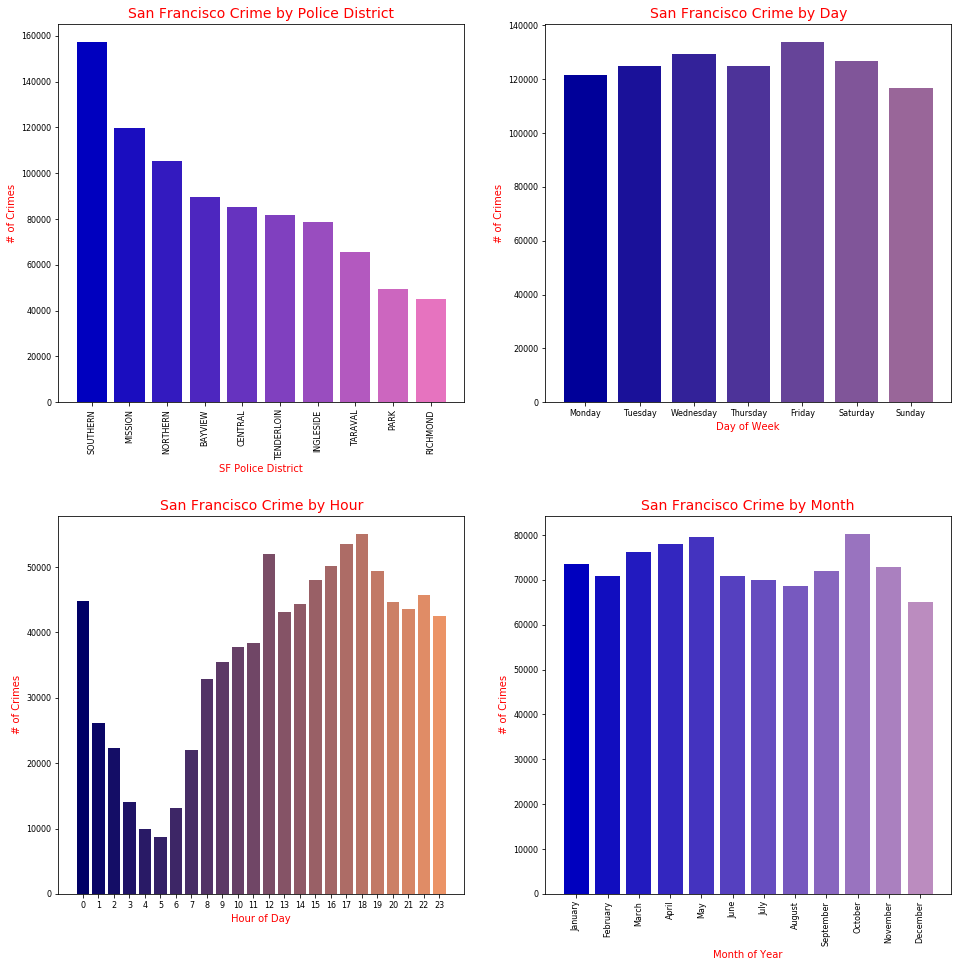

In [5]:
# set up 2 x 2 plot figure
fig = plt.figure(figsize = (16,16))

axpd = fig.add_subplot(2,2,1)
axmo = fig.add_subplot(2,2,4)
axhr = fig.add_subplot(2,2,3)
axday = fig.add_subplot(2,2,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.3)

#crimes by police district
pd_sf = sf["PdDistrict"].value_counts()
pd_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(pd_sf))]
axpd.bar(height = pd_sf,x = arange(len(pd_sf)),color = pd_colors)
axpd.set_xticks(arange(len(pd_sf)))
axpd.set_xticklabels(pd_sf.index,rotation = 90)
axpd.set_ylabel('# of Crimes', size = 10, color = 'r')
axpd.set_xlabel('SF Police District', size = 10, color = 'r')
axpd.tick_params(axis= 'x', labelsize = 8)
axpd.tick_params(axis= 'y', labelsize = 8)
axpd.set_title('San Francisco Crime by Police District', size = 14, color = 'r')

#crimes by hour of day
hr_sf = sf["Hour"].value_counts()
hr_colors = [(x/25.0, x/40.0, 0.4) for x in range(len(hr_sf))]
hr_heights = hr_sf.sort_index().values
hr_positions = hr_sf.sort_index().index
axhr.bar(height = hr_heights,x = hr_positions, color = hr_colors)
axhr.set_xticks(arange(len(hr_positions)))
axhr.set_ylabel('# of Crimes', size = 10, color = 'r')
axhr.set_xlabel('Hour of Day', size = 10, color = 'r')
axhr.tick_params(axis= 'x', labelsize = 8)
axhr.tick_params(axis= 'y', labelsize = 8)
axhr.set_title('San Francisco Crime by Hour', size = 14, color = 'r')

#crimes by day of week
day_sf = sf["Day"].value_counts()
day_colors = [(x/10.0, x/15.0, 0.6) for x in range(len(pd_sf))]
day_sf.reset_index().rename(mapper = {'index': 'Day', 'Day': '#_of_Crimes'}, axis = 'columns')
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sf = day_sf.reindex(sorter)
day_heights = day_sf.values
day_positions = day_sf.index
axday.bar(height = day_heights,x = day_positions, color = day_colors)
axday.set_xticks(arange(len(day_positions)))
axday.set_ylabel('# of Crimes', size = 10, color = 'r')
axday.set_xlabel('Day of Week', size = 10, color = 'r')
axday.tick_params(axis= 'x', labelsize = 8)
axday.tick_params(axis= 'y', labelsize = 8)
axday.set_title('San Francisco Crime by Day', size = 14, color = 'r')

#crimes by month
mo_sf = sf["Month"].value_counts()
mo_colors = [(x/15.0, x/20.0, .75) for x in range(len(mo_sf))]
mo_sf.reset_index().rename(mapper = {'index': 'Month', 'Day': '#_of_Crimes'}, axis = 'columns')
mo_sorter = ['January', 'February', 'March', 'April', 'May', 
          'June', 'July', 'August', 'September', 'October', 'November', 'December']
mo_sf = mo_sf.reindex(mo_sorter)
mo_heights = mo_sf.values
mo_positions = mo_sf.index
axmo.bar(height = mo_heights,x = mo_positions, color = mo_colors)
axmo.set_xticks(arange(len(mo_positions)))
axmo.set_xticklabels(mo_positions,rotation = 90)
axmo.set_ylabel('# of Crimes', size = 10, color = 'r')
axmo.set_xlabel('Month of Year', size = 10, color = 'r')
axmo.tick_params(axis= 'x', labelsize = 8)
axmo.tick_params(axis= 'y', labelsize = 8)
axmo.set_title('San Francisco Crime by Month', size = 14, color = 'r')

plt.show()

<font color=red>CONCLUSIONS</font>: 

1. There is a relationship between Police District (i.e. location in SF) and # of crimes.
2. There is a relationship between Hour of the Day and # of crimes.
3. There does not appear to be a relationship between Day of the Week and # of crimes.
4. There does not appear to be a relationship between Month and # of crimes.
<br><br><br>

Text(0.5, 1.0, 'San Francisco Crime by Hour')

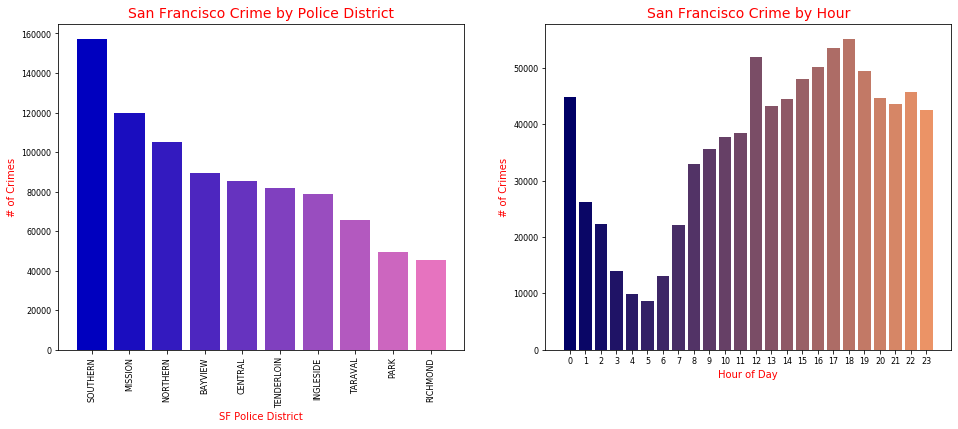

In [14]:
#set up 2 x 1 plot for Kaggle presentation

fig = plt.figure(figsize = (16,6))

axpdk = fig.add_subplot(121)
axhrk = fig.add_subplot(122)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.3)

#crimes by police district
pd_sf = sf["PdDistrict"].value_counts()
pd_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(pd_sf))]
axpdk.bar(height = pd_sf,x = arange(len(pd_sf)),color = pd_colors)
axpdk.set_xticks(arange(len(pd_sf)))
axpdk.set_xticklabels(pd_sf.index,rotation = 90)
axpdk.set_ylabel('# of Crimes', size = 10, color = 'r')
axpdk.set_xlabel('SF Police District', size = 10, color = 'r')
axpdk.tick_params(axis= 'x', labelsize = 8)
axpdk.tick_params(axis= 'y', labelsize = 8)
axpdk.set_title('San Francisco Crime by Police District', size = 14, color = 'r')

# #crimes by hour of day
hr_sf = sf["Hour"].value_counts()
hr_colors = [(x/25.0, x/40.0, 0.4) for x in range(len(hr_sf))]
hr_heights = hr_sf.sort_index().values
hr_positions = hr_sf.sort_index().index
axhrk.bar(height = hr_heights,x = hr_positions, color = hr_colors)
axhrk.set_xticks(arange(len(hr_positions)))
axhrk.set_ylabel('# of Crimes', size = 10, color = 'r')
axhrk.set_xlabel('Hour of Day', size = 10, color = 'r')
axhrk.tick_params(axis= 'x', labelsize = 8)
axhrk.tick_params(axis= 'y', labelsize = 8)
axhrk.set_title('San Francisco Crime by Hour', size = 14, color = 'r')


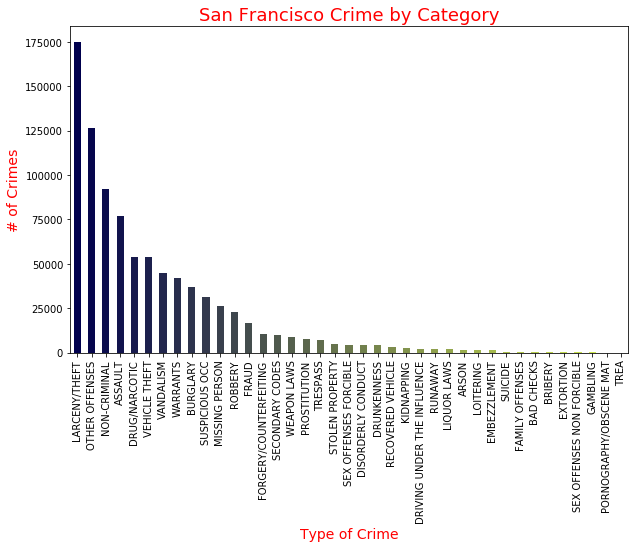

In [68]:
#crimes by category
cat_sf = sf["Category"].value_counts()

plt.figure(figsize=(10,6))
cat_colors = [(x/45, x/40.0, 0.3) for x in range(len(cat_sf))]
ax_rank = cat_sf.plot.bar(color = cat_colors)

ax_rank.set_ylabel('# of Crimes', size = 14, color = 'r')
ax_rank.set_xlabel('Type of Crime', size = 14, color = 'r')
ax_rank.set_title('San Francisco Crime by Category', size = 18, color = 'r')

plt.show()

In [9]:
#length of descript value counts
print("# of crime types under Descript:", len(sf["Descript"].value_counts()))
print('\n')

#new df of year,category,descript
sf_yr = sf.reindex(columns = ["Year", "Category", "Descript"])
print(sf_yr["Category"].value_counts().head())

# of crime types under Descript: 879


LARCENY/THEFT     174900
OTHER OFFENSES    126182
NON-CRIMINAL       92304
ASSAULT            76876
DRUG/NARCOTIC      53971
Name: Category, dtype: int64


<font color=red>CONCLUSIONS</font>:
1. Too many crime descriptions for meaningful plot

2. Top 5 crime Categories by # of crimes committed:

    - LARCENY/THEFT
    - OTHER OFFENSES
    - NON-CRIMINAL
    - ASSAULT
    - DRUG/NARCOTIC
<br><br><br>

In [10]:
#new df with top 5 crimes Category, grouped by Category and year
sf5_yr = sf_yr[(sf_yr["Category"] == 'LARCENY/THEFT') | (sf_yr["Category"] == 'OTHER OFFENSES') |
                         (sf_yr["Category"] == 'NON-CRIMINAL') | (sf_yr["Category"] == 'ASSAULT') |
                         (sf_yr["Category"] == 'DRUG/NARCOTIC') ].groupby([ "Year", "Category"] 
                         ).size().reset_index(name = 'counts')


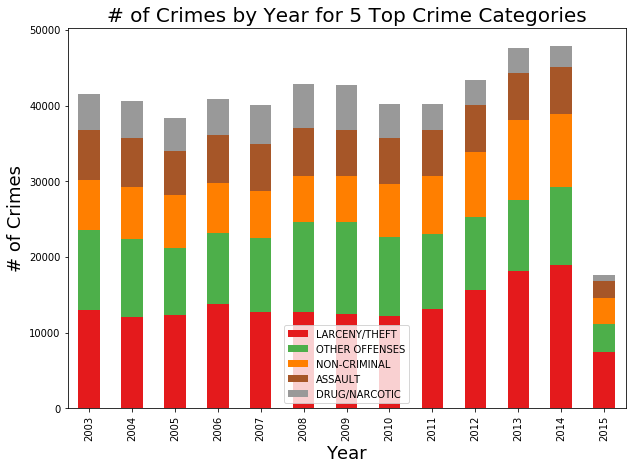

In [107]:
#stacked bar chart of top 5 crimes(by # committed) by year
pivot_sf5_yr = sf5_yr.pivot(index='Year', columns='Category', values='counts')
pivot_sf5_yr.loc[:,['LARCENY/THEFT','OTHER OFFENSES', 'NON-CRIMINAL', 
                'ASSAULT', 'DRUG/NARCOTIC']].plot.bar(stacked=True,figsize=(10,7), colormap = 'Set1').legend(loc = 8)

plt.xlabel("Year", fontsize = 18)
plt.ylabel("# of Crimes", fontsize = 18)
plt.title("# of Crimes by Year for 5 Top Crime Categories", fontsize = 20)
plt.show()

<font color=red>CONCLUSIONS</font>: 

1. From 2011 - 2014 there appears to have been a steady increase in the # of crimes committed in the top 5 crime Categories, which may have continued into 2015 if the full year data was available.
2. Looking at the size of the bars, the number of Larceny/Theft crimes has increased from 2010 - 2014.
3. Looking at the size of the bars, the number of Non Criminal “crimes” has increased from 2010 - 2014
4. Looking at the size of the bars, the number of crimes in the other categories appears to have been stable from 2003 - 2015.
<br><br><br>

In [12]:
#values in 'Descript'
sf_yr['Descript'].value_counts().head()

GRAND THEFT FROM LOCKED AUTO             60022
LOST PROPERTY                            31729
BATTERY                                  27441
STOLEN AUTOMOBILE                        26897
DRIVERS LICENSE, SUSPENDED OR REVOKED    26839
Name: Descript, dtype: int64

In [ ]:
sf5_yr = sf_yr[(sf_yr["Category"] == 'LARCENY/THEFT') | (sf_yr["Category"] == 'OTHER OFFENSES') |
                         (sf_yr["Category"] == 'NON-CRIMINAL') | (sf_yr["Category"] == 'ASSAULT') |
                         (sf_yr["Category"] == 'DRUG/NARCOTIC') ].groupby([ "Year", "Category"] 
                         ).size().reset_index(name = 'counts')
cat_5c = sf5_yr.pivot(index='Year', columns='Descript', values='counts')

In [13]:
#new df with top 5 crimes from Descript
desc_5 = sf_yr[(sf_yr["Descript"] == 'GRAND THEFT FROM LOCKED AUTO')|
                  (sf["Descript"] == 'LOST PROPERTY') |
                  (sf["Descript"] == 'BATTERY') | 
                  (sf["Descript"] == 'STOLEN AUTOMOBILE') |
                  (sf["Descript"] == 'DRIVERS LICENSE, SUSPENDED OR REVOKED') ].copy()

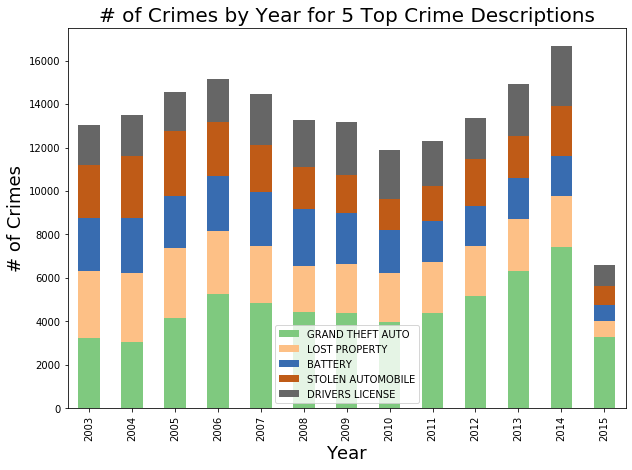

In [14]:
#add a row total to the desc_5 df, rename columns

desc_5c = desc_5.groupby([ "Year", "Descript"] 
                       ).size().reset_index(name = 'counts'
                       ).pivot(index='Year', columns='Descript', values='counts')
desc_5c.rename(columns = {'GRAND THEFT FROM LOCKED AUTO': 'GRAND THEFT AUTO',
                         'DRIVERS LICENSE, SUSPENDED OR REVOKED': 'DRIVERS LICENSE',
                         'BATTERY': 'BATTERY',
                         'LOST PROPERTY': 'LOST PROPERTY',
                         'STOLEN AUTOMOBILE': 'STOLEN AUTOMOBILE',
                         'Year Total': 'Year Total'}, inplace = True)

desc_5c["Year Total"] = desc_5c.sum(axis = 1)

#stacked bar chart of top 5 crime Descriptions
desc_5c.loc[:,['GRAND THEFT AUTO','LOST PROPERTY', 'BATTERY', 
               'STOLEN AUTOMOBILE', 'DRIVERS LICENSE']
               ].plot.bar(stacked=True,figsize=(10,7), colormap = 'Accent').legend(loc = 8)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("# of Crimes", fontsize = 18)
plt.title("# of Crimes by Year for 5 Top Crime Descriptions", fontsize = 20)
plt.show()

<font color=red>CONCLUSIONS</font>: 
1.  The total number of crimes shows a cyclical pattern, peaking in a year, dropping down and then rising again.
2.  The number of "Grand Theft Auto" crimes has been increasing since 2010.
3.  The number of "Battery" crimes was steady from 2003 - 2009, then decreased to a new steady value for 2010 - 2014.
4. The number of "Lost Property" crimes was steady from 2003 - 2006, then decreased to a new steady value for 2007 - 2014.
<br><br><br>

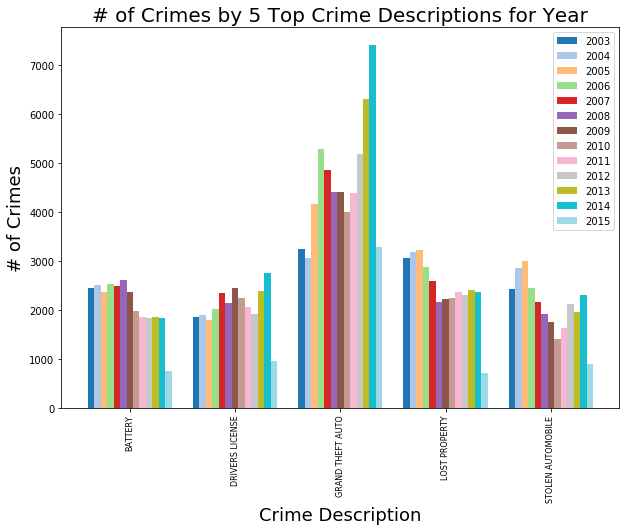

In [116]:
#Same plot as "# of Crimes by Year for 5 Top Crime Descriptions" just exchanged Year and Descriptions 

#grouped bar chart of top 5 crime Descriptions by year
desc_5r = desc_5.groupby([ "Year", "Descript"] 
                       ).size().reset_index(name = 'counts'
                                           ).pivot(index='Descript', columns='Year', values='counts')
desc_5r.rename(index = {'GRAND THEFT FROM LOCKED AUTO': 'GRAND THEFT AUTO',
                         'DRIVERS LICENSE, SUSPENDED OR REVOKED': 'DRIVERS LICENSE',
                         'BATTERY': 'BATTERY',
                         'LOST PROPERTY': 'LOST PROPERTY',
                         'STOLEN AUTOMOBILE': 'STOLEN AUTOMOBILE',
                         'Year Total': 'Year Total'}, inplace = True)
desc_5r.loc[:,[2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
                   ].plot.bar(stacked=False,figsize=(10,7), colormap = 'tab20', width =.8).legend(loc = 1)
plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel("Crime Description", fontsize = 18)
plt.ylabel("# of Crimes", fontsize = 18)
plt.title("# of Crimes by 5 Top Crime Descriptions for Year", fontsize = 20)
plt.show()

<font color=red>CONCLUSION</font>: This chart shows that "Grand Theft Auto" is the most common crime every year, although in 2003 and 2004 the number was comparable to "Lost Property".
<br><br><br>

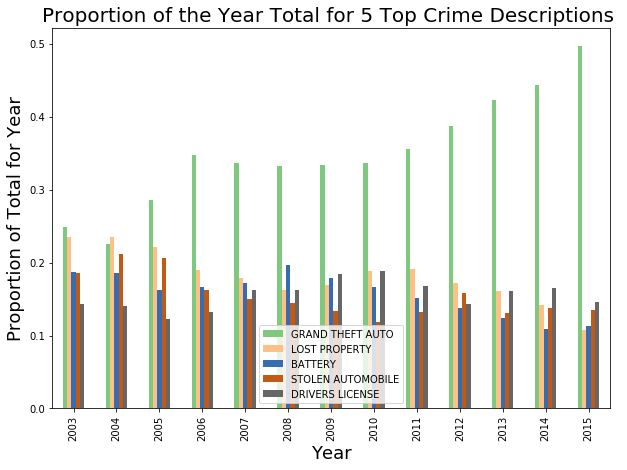

In [15]:
# year proportions for Crime Descriptions
desc_5_prop = pd.DataFrame(columns = ['GRAND THEFT AUTO', 
                                          'LOST PROPERTY','BATTERY', 
                                          'STOLEN AUTOMOBILE', 'DRIVERS LICENSE', 'Year Total' ])

desc_5_prop['GRAND THEFT AUTO'] = desc_5c['GRAND THEFT AUTO']/desc_5c['Year Total']
desc_5_prop['LOST PROPERTY'] = desc_5c['LOST PROPERTY']/desc_5c['Year Total'] 
desc_5_prop['BATTERY'] = desc_5c['BATTERY']/desc_5c['Year Total']
desc_5_prop['STOLEN AUTOMOBILE'] = desc_5c['STOLEN AUTOMOBILE']/desc_5c['Year Total']
desc_5_prop['DRIVERS LICENSE'] = desc_5c['DRIVERS LICENSE']/desc_5c['Year Total']
desc_5_prop['Year Total'] = desc_5c['Year Total']/desc_5c['Year Total']


# plot
desc_5_prop.loc[:,['GRAND THEFT AUTO','LOST PROPERTY', 'BATTERY', 'STOLEN AUTOMOBILE', 'DRIVERS LICENSE']
                     ].plot.bar(stacked=False,figsize=(10,7), colormap = 'Accent').legend(loc = 8)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Proportion of Total for Year", fontsize = 18)
plt.title("Proportion of the Year Total for 5 Top Crime Descriptions ", fontsize = 20)
plt.show()

<font color=red>CONCLUSION</font>: From 2010 on the proportion of the top 5 crime Descriptions within a year that were 'Grand Theft Auto' has steadily increased, reaching around 45% in the last year of complete data (2014).  ‘Stolen Automobile” proportion was 10-15% during this same time period. For 2010- 2015, Car related crimes were more than half of the total of the top 5 crimes.

<br><br><br>

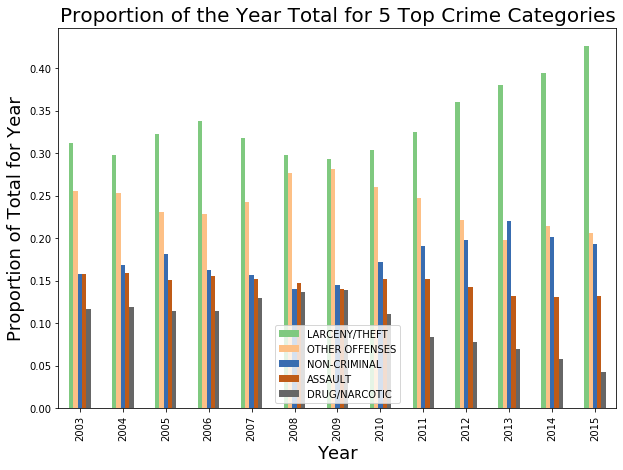

In [109]:
# year proportions for Top 5 Crime Categories
cat_5 = sf5_yr.pivot(index='Year', columns='Category', values='counts')
cat_5["Year Total"] = cat_5.sum(axis = 1)
cat_5_prop = pd.DataFrame(columns = ['LARCENY/THEFT', 
                                     'OTHER OFFENSES','NON-CRIMINAL', 
                                     'ASSAULT', 'DRUG/NARCOTIC', 'Year Total' ])

cat_5_prop['LARCENY/THEFT'] = cat_5['LARCENY/THEFT']/cat_5['Year Total']
cat_5_prop['OTHER OFFENSES'] = cat_5['OTHER OFFENSES']/cat_5['Year Total'] 
cat_5_prop['NON-CRIMINAL'] = cat_5['NON-CRIMINAL']/cat_5['Year Total']
cat_5_prop['ASSAULT'] = cat_5['ASSAULT']/cat_5['Year Total']
cat_5_prop['DRUG/NARCOTIC'] = cat_5['DRUG/NARCOTIC']/cat_5['Year Total']
cat_5_prop['Year Total'] = cat_5['Year Total']/cat_5['Year Total']


# plot
cat_5_prop.loc[:,['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT', 'DRUG/NARCOTIC']
              ].plot.bar(stacked=False,figsize=(10,7), colormap = 'Accent').legend(loc = 8)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Proportion of Total for Year", fontsize = 18)
plt.title("Proportion of the Year Total for 5 Top Crime Categories", fontsize = 20)
plt.show()

<font color=red>CONCLUSIONS</font>: 
1. From 2009 - 2015 there is a steady increase in the proportion of Larceny/Theft crimes (total Larceny/Theft divided by total top 5 Crime Categories).  
2. From 2009 - 2015 the proportion of Drug/Narcotic crimes decreased. 
3. There was an increase in the proportion of Non Criminal offenses from 2009 - 2013, with a decrease from 2013 - 2015.
4. Proportion of Other Offenses decreased from 2009 - 2013.
